# A Exploration of Phylogentic Inference Algorithms and Distance Methods

## Content

1. What is phylogenetics?
    * Introduction to problem
    * A layman's guide to the Mathematical models and distance methods compared
2. Implementations of the proposed models 
    1. Distance Functions
        * Jukes Cantor
        * Judging Jukes-Cantor
    2. UPGMA algorithm
    3. Neighbor Joining Algorithm
    4. Measuring Inference against Simulation
3. Mathematical Explorations 
    1. Markov Chains
        * Computing Probabilties
    2. Phylogenetic Distances
        * Kimura-2 Distance Derivation
4. Results
5. Conclusion

## What is phylogenetics?

### Introduction to the problem

Phylogentics is a study of the evolutionary relationships between living organims. We are able to do this, because we assume there is some underlying evolutionary tree. In essence, it tries to determine whether you're more closely related to one group (e.g. amphibians) or another (e.g. rodents) and by how much. As reference, one group or leaf of the tree is called a taxon. To give some history of this field, in the time period around the 1820s, phylogenetic trees were built based on observed similarities such as an organism's morphology. As you can presume, this can lead to many sources of misconceptions between two scientists. Below is an example of what a phylogenetic tree looks like.

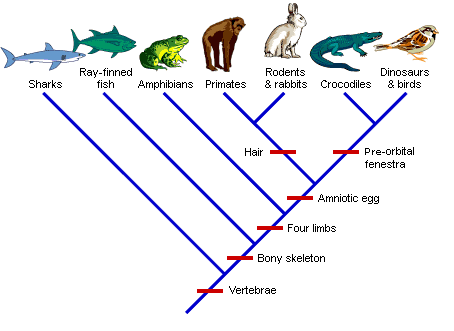

In [2]:
import IPython.display 
phyl = IPython.display.Image("http://medsocnet.ncsa.illinois.edu/MSSW/moodle/file.php?file=/evolution_tree_000.PNG")
phyl


As science and technology advanced, we encountered the revolution in the biotechnology, that is the development of the laboratory process of genome sequencing and even the discovery of the structure of DNA. DNA, $\textit{deoxyribonucleic acid}$, is the genetic "blueprint" that encodes the information used to manufcture proteins and cells needed for every facet of an organism's life. Even viruses who aren't considered "living", biologically, require DNA. Within these DNA sequences are strings of the letters A, T, C, and G. These "letters" represent nucleotides that pair to one another according to their respective chemical properties. The way in which they pair gives rise to DNA's double helix structure. Because of the uniqueness and specificity of DNA, the information retrieved from it has allowed us to make better predictions on the molecular evolution of all kinds species. Moreover, having the ancestor and progeny DNA sequences makes observing evolutionary history much clearer, since DNA is passed from parent to offspring. More specifically, this is done by observing when two sequences of the same type of DNA mutate and then using mathematical models and algorithms to construct a tree. Once complex computations are done, the algorithm yields a tree according to that model's parameters. It is important to note that using DNA sequences instead of just mere human observations does not necessarily imply accurate trees. Nonetheless, we are able to extrapolate as authentic a phylogentic tree possible given those data. Deducing an accurate tree is still an open field of research.

These models create a framework in which phylogenetic distances are computed according to properties of that model. More generally, the algorithms determine how certain species are related at a certain point in the tree using distances calculated. You can think of these trees as fancy history timelines with some uncertainty. The "distances" calculated are the distances between two species within this tree. Each root or node of a tree represents a common ancestor; and each time some form of evolutionary event occurs, the tree branches and splits off into two or more leaves. These leaves represent taxa, which are a group of one or more organisms. As you can imagine, over time there can be as many or few leaves on a tree and not all the same lengths! In fact, there are multiple ways to calculate these distances that we explored. It is also important to realize that all these disances methods take on different assumptions and parameters in a way the final tree constructed does as well.

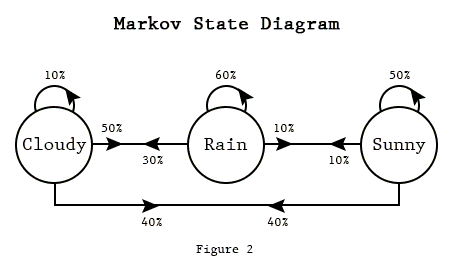

In [3]:
import IPython.display 
phyl = IPython.display.Image('http://4.bp.blogspot.com/-u9XslQrACb8/VK71Cym3zQI/AAAAAAAAAA0/DAxkKTcCKvc/s1600/markovdiag.png')
phyl

The diagram above is an example of the Markov Chain process. Simply put, the probabiity of the next day being "Cloudy", "Rainy", or "Sunny" is dependent on the weather condtions the day before and not on the many days before it. 

Unfortunately, all of the known distance methods and inference algorithms are not explored here, because of time constraints and man-effort; nonetheless, just the complexity of biology will have stumped us like it stumps the many people who are work at the forefront of this field. This is because there are a plethora of parameters that can be used to determine the distance. Furthermore, even within those parameters, there are ample biological exceptions--possibly undiscovered ones too--and spontaneous possible events that would violate those assumptions. And so, to get anywhere with trying to understand the evolutionary history of some species, presumptions that are not too harmful or unreasonable have to be made. As aforementioned, certain distance methods have distinguishing assumptions made in order to calculate said distances. Once these distances are calculated, the issue of whether the species who are closest in distance are actually evolutionary neighbors arises, since after all it can just be coincidence. Moreover, there is another dilemma being how close one group of organisms is from another group on a separate branch. It truly is a complex field. 

To reiterate, this project investigates a few of the many mathematical and computational techniques used to model evolution between different species. The algorithms compared were $\textbf{UPGMA (Unweighted Pair Group Method with Arithmetic Mean)}$ and $\textbf{Neighbor-Joining}$. These phylogenetic inference algorithms yielded trees according to evolution simulated by the $\textbf{Jukes-Cantor model}$. Despite only modeling evolution according the Jukes-Cantor model, there are other models. All, if not a majority of these distance models, fall under the umbrella of being a modificiation of the very general DNA substitution model: the $\textbf{Markov chain model}$. The Markov Chain models are models with the property that changes, such as the mutation of DNA, imposed on the future state of the system is dependent on only present state and not the many previous states before. Additonally, this also means the nucelotide base changes are independent of each other. Namely, the Markov model is "forgetful" and has no "memory" of the nucelotide changes that may have occurred before as influence.

Phylogenetics is not just the study of the evolutionary history of various organisms. In reality, the information given by these relationsips are used to tackle practical biological problems. We explore an application of this when we attempt to determine if a dentist infected his patients with HIV given the respective sequences. More modern and pressing problems such as understanding the role and possible progression (or reduction) of noncoding DNA within differing species'genomes over time and the modeling the development of tumor cells over time. In other words, phylogenetics can be used on a smaller scale with quite critical results. In addition to the biological applications, this project explores the refinement of the phylogenetic inference algorithms and distance methods through demonstration and discussion of the striking differences between the results acquired.

### A Layman's Guide to Models for DNA Mutation

There are many ways to infer phylogenetic trees. In fact, the first way is to just look in the space of trees--the number possible trees--in a taxa and then choose what best fits the data. This is impractical because of the amount of computation for say, twenty taxa, is difficult to achieve. Another fun fact: the number of trees within this space of trees can exceed the number of atoms in the universe. Insane! Though, it is difficult for compute for that many taxa, there are methods such as $\textbf{Maximum Parsimony}$ and $\textbf{Maximum Likelihood}$--methods we will not delve into--that use this concept to pick the most reasonable tree. The idea behind Maximum Parisomy derives from the principle of $\textit{Occam's Razor}$ which basically states that nature wants to choose the most convenient path. What this algorithm does is assign a tree a parsimony score based on the given DNA sequences and determines what is most reasonable. Maxmimum Likelihood, on the other hand, picks a the most "likely" evolutionary tree given the relationships. And so, the other method is to try and build a tree that fits the data given. This is what "distance-based methods" are. The  distance-based method algorithms compared are UPGMA (Unweighted Pair Group Method with Arithmetic Mean) and Neighbor-Joining. We only compared two inference algorthims, but there are definitely more algorithms and distance models. For instance, in between the development of UPGMA and Neighbor-Joining, there was the $\textbf{Fitch-Margoliash algorithm}$ that is actually quite close to Neighbor-Joining. Hence, we compared the two methods more striking in their differences. These phylogenetic inference algorithms yielded trees according to evolution simulated by the Jukes-Cantor model. Once we obtained the model for DNA mutation, we were then able to calculate possible phylogenetic distances, in other words, how closely related two sequences are.

To begin, evolution was simulated using a function, $\texttt{mutate (A, t, seq)}$ , on sample aligned DNA sequences according to whichever model for DNA mutation we chose; for example, Jukes-Cantor, Kimura-2, and Kimura-3. We used the Jukes-Cantor model. This function "mutated" the aforementioned sequence according to time and the individual parameters given by each model. To get a better picture, when using the function $\texttt{mutate()}$ to simulate evolution according to the Jukes-Cantor model, Jukes-Cantor distances between the ancestor and progeny sequences were computed. Once these distances were calculated, phylogenetic inference algorithms, such as the neighbor-joining algorithm, were implemented to produce phylogenetic trees. Each algorithm evidently deduced a different tree, and those trees were compared. In addition, different trees would be constructed when the distance method used changed.

#### Jukes- Cantor Model

The first and simplest distance model used was the $\textbf{Jukes-Cantor}$ model. The Jukes-Cantor model begins by assuming each site mutates independently according to a Markov chain and all bases (nucleotides) within a DNA sequence occur with equal probability: $\frac{1}{4}$. This means the likelihood of the purine (Adenine($\textbf{A}$) and Guanine($\textbf{G}$) being substituted by a pyrimidine (Cytosine($\textbf{C}$) and Thymine($\textbf{T}$)) Lastly, it also assumes that the transition probabilities of the base substitutions are the same $\alpha$; this is the rate at which evolution occues. You can probably recall the particulars of DNA and how certain nucleotides bond with each other due to their chemical and structural properties. The pitfall of the this assumption is that sort of substitution is highly unlikely--or at least occur with different probabilties--because of the steric hindrance and chemical properties between their molecular structures. Lastly, this model--and the other ones as well--adopts the $\textit{molecular clock}$ assumption which presumes that DNA mutation rates of observable substitutions, $\alpha$, are constant. Realistically, the rates may not be constant, since it has been shown that the rates can be dependent on whether DNA is noncoding or coding and can change based upon the time and location of a particular sequence within DNA. Moreover, it is not strictly true that everything evolved at the same time; some changes happen sooner than later than others, especially if you consider possilble environmental phenomena. Mathematically, the distance is given by: $$
\begin{equation*}
d_{JC}(S_0, S_n) = \frac{3}{4} \ln (1-\frac{4}{3}p)
\end{equation*}
$$
where $\ S_0$ and $\ S_n$ is the ancestor and  is the progeny sequences, respectively; and $\textit{p}$ is the fraction of the sites changed between $\ S_0$ and $\ S_n$.
Despite making many assumptions, this model was useful in that it allows preliminary estimation calculations to be made. 

#### Kimura-2 and Kimura-3 Models

Unlike the Jukes-Cantor model, the $\textbf{Kimura}$ models consider more than one parameter to compute the distances between ancestor and progeny DNA sequences. In addition to mutation rates, the $\textbf{Kimura-2}$ model incorporates different transition probabilties based on the various types of biological mutations such as the rate of transitions, $\textit{p}$, (i.e.purine $\longleftrightarrow$ purine) and rates of transversions, $\textit{q}$ (i.e.purine $\longleftrightarrow$ pyrimidine). Transversions occur when a nucelotides change change from A $\leftrightarrow$ C, A $\leftrightarrow$ T, C $\leftrightarrow$ G, and G $\leftrightarrow$ T. Transitions occur when nucleotides change from A $\leftrightarrow$ G and C $\leftrightarrow$ T.  Mathemtically, the distance given by the Kimura-2 parameter model is:

$$
\begin{equation*}
d_{K2}(S_0, S_n) = \frac{-1}{2} \ln (1-2p-2q) - \frac{-1}{4} \ln (1-2q)
\end{equation*}
$$

where $\ S_0$ and $\ S_n$ is the ancestor and is the progeny sequences, respectively; and $\textit{p}$ is the proportion of transitions(number of transitions divided by the length of the sequence and $\textit{q}$ is the proportion of transversions(number of transversions divided by the length of the sequence).

In fact, biologically, there are two types of transversions: an exchange between one-ring and two-ring structures in DNA. The $\textbf{Kimura-3}$ model takes this into account by considering a third parameter, $\gamma$, for the rates of two-ring transversions. Unlike the Kimura-2 model, the Kimura-3 model acknowldeges that some types of transversions occur at different rates. These transversions are split up into groups; the first accounts for changes from A $\leftrightarrow$ C and G $\leftrightarrow$ T, which we note as $\gamma$ ; the other for changes from A $\leftrightarrow$ T and C $\leftrightarrow$ G which we note as $\delta$. Mathematically,, the distance given by the Kimura-3 parameter model is:

$$
\begin{equation*}
d_{K3}(S_0, S_n) = \frac{-1}{4} \ln (1-2\beta-2\gamma) + \ln (1-2\beta-2\delta) + \ln (1-2\gamma-2\delta)
\end{equation*}
$$

where $\ S_0$ and $\ S_n$ is the ancestor and  is the progeny sequences, respectively; and $\beta$ is the proportion of transitions and $\gamma$ is the proportion of first type of transversion and $\delta$ is the second type of transversion as noted above.

Distances between initial and final sequences were compared using both models that were used in the phylogenetic inference algorithms.

#### Unweighted Pair Group Method with Arithmetic Mean (UPGMA) Algorithm

The next area of adjustment is based upon the difference between two phylogenetic inference algorithms: Neighbor-Joining and UPGMA. Between the two, $\textbf{UPGMA}$ is the much simpler one, because it makes more assumptions. These include $\textit{molecular clock}$ assumption, which assumes a constant mutation rate $\alpha$ of the DNA sequences. UPGMA begins by using the calculated Jukes-Cantor distances--or the distance from the Kimura-2 and Kimura-3 model--and joining the closest pair of taxa, presuming that the two closest taxa should be neighbors. In order to start building metric trees, each edge of the tree from which the temporary root was created is assumed to be weighted equally. This harks back at $\textit{molecular clock}$ assumption. Essentially, UPGMA takes the average Jukes-Cantor distance between two sequences, creates a temporary root that is then collapsed. This temporary root is used to compute the average Jukes-Cantor distance between the new, collapsed temporary root and another sequence. This process is repeated until all sequences have neighbors. It is a naive approach, because equivalent distances are assigned to each leaf that is branced from that node. Naturally, this is not always true; however, these simplifying instructions, like the Jukes-Cantor model, allows basic models to be created and make simple predictions of the evolutionary relationships between the different species.

#### Neighbor- Joining Algorithm

Despite the simplicity of the UPGMA algorithm, it fails when $\alpha$ is not constant and by necessitating that species with the smallest Jukes-Cantor distance are neighbors. This is not  always guaranteed, especially when the molecular clock assumptions fails. Hence, the $\textbf{Neighbor-Joining}$ algorithm is implemented, since it has the criterion that the leaves of a rooted vertex guarantees that those two species are neighbors when the distance calculated is the minimum.(Sidenote: this is mathematically proven somewhere on the interweb.) Even so, neighbor-joining runs into a wall when there exists the possibility of joining two things that are not neighbors, but the distance between them are minimums. The Neightbor-Joining algorithm proceeds in much of the same way in that it takes the taxa that are at a minimum distance from each other, collapse those two temporarily, and compute the distance from that taxa to other members in the tree. Despite this, between the two algorithms, Neighbor-Joining is superior: it does not implicity use the molecular clock assumption and is accessbile over broader, larger range of data. In conclusion, this algorithm as become the optimal method of choice for constructing trees.


###  Libraries and Tools Used

In [4]:
import numpy as np
from scipy.io import loadmat
from numpy import linalg as LA
from ete3 import Tree
import sys 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pylab

pylab.rcParams['figure.figsize'] = (4.0, 2.0)


/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
hiv_data = loadmat('flhivdata.mat')

dnt    = hiv_data["dnt"][0]

ctrl_1 = hiv_data["lc1"][0]
ctrl_5 = hiv_data["lc5"][0]

ptb    = hiv_data["ptb"][0]
ptc	   = hiv_data["ptc"][0]
ptd    = hiv_data["ptd"][0]

min_len = min(len(dnt),len(ctrl_1),len(ctrl_5),len(ptb),len(ptc),len(ptd))

def chop(seq):
    ans    = min_len*["o"]
    tokens = list(seq)
    for i in xrange(min_len):
        ans[i] = tokens[i]
    return ''.join(ans)

dnt    = chop(dnt)
ctrl_1 = chop(ctrl_1)
ctrl_5 = chop(ctrl_5)

ptb    = chop(ptb)
ptc    = chop(ptc)
ptd    = chop(ptd)

## Implementations of the proposed models 

### Distance Functions

#### *Jukes-Cantor Distance*

In [6]:
"""
Constructs a Jukes Cantor transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def JC_matrix(a):

    """
    >>> np.trace(JC_matrix(.25))
    3.0
    """

    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M

"""
Computes proportion of differing letters from two strings of the same size
Args:
    s1: string 1
    s2: string 2 
Returns:
    Throws error if the strings are not of the same length
    Else, returns proportion (in between 0 and 1) of differing letters
"""

def prop_diff(s1,s2):
    if len(s1) != len(s2):
        raise ValueError("Cannot compute compare DNA sequences of differing length")
    diffs = 0
    i     = 0
    while i < len(s1):
        if s1[i] != s2[i]:
            diffs += 1
        i += 1
    return float(diffs)/float(len(s1))

"""
Computes the JC distance between two sequences.
Args:
    s1: string 1
    s2: string 2 
Returns:
    Throws error if the strings are not of the same length
    Else, computes JC distance
"""

def JC_distance(s1,s2):
    diffs = prop_diff(s1,s2)
    return 1 - (np.log(1 - 4/3*diffs))

"""
Returns JC Matrix give sequences
"""

def JC_matrix_maker(seqs):
  M = np.zeros((len(seqs),len(seqs)))
  for i in xrange(len(seqs) - 1):
    s1 = seqs[i]
    for j in xrange(i, len(seqs)):
      s2 = seqs[j]
      M[i][j] = JC_distance(s1,s2)
  return M


### Mutate as a test for the accuraccy of Jukes Cantor

We used mutate() to simulate evolution according to the Jukes Cantor model on
a suitable starting sequence. The Jukes Cantor distance was then computed
between the final sequence and the initial sequence and subsequently compared
to the actual distance. By doing this, we were able to answer the question of what effects does varying the parameters (Jukes-Cantor parameter and time) have.

In [7]:
"""
    Given a character 'A' 'G' 'C' or 'T' returns number corresponding
    to the index in whcih we need to index in our vector
    Args:
        nuc: character 'A' 'G' 'C' or 'T'
    Returns:
        number 0,1,2,3 indicatin what index to set to 1
"""

def DNA_to_position(nuc):
    if nuc == 'A':
        return 0
    if nuc == 'G':
        return 1
    if nuc == 'C':
        return 2
    if nuc == 'T':
        return 3

"""
    Given a number 0,1,2,3 returns character 'A' 'G' 'C' or 'T'
    corresponding to the nucleic acid represented in the model
    Args:
        number 0,1,2,3
    Returns:
        character 'A' 'G' 'C' or 'T' orresponding to the
        nucleic acid represented in the model
"""

def position_to_DNA(pos):
    if pos == 0:
        return 'A'
    if pos == 1:
        return 'G'
    if pos == 2:
        return 'C'
    if pos == 3:
        return 'T'

"""
    Mutates the DNA string seq, int t times according to the
    Jukes-Cantor model specified by the alpha value, a
    Args:
        a:   alpha level for the Jukes Cantor Matrix
        t:   number of time steps we plan to simulate
        seq: Sequence of DNA represented as a string
    Returns:
        simulated descendant sequence after t time steps
        consitently represented as a string
"""

def mutate(a, t, seq):
    M = JC_matrix(a)
    M = LA.matrix_power(M, t)
    tokens = list(seq)
    for i in xrange(len(tokens)):
        p = np.zeros(4)
        p[DNA_to_position(tokens[i])] = 1
        p = np.dot(M,p)

        rand= np.random.rand()
        if rand < p[0]:
            val = 'A'
        elif rand < p[0]+p[1]:
            val = 'G'
        elif rand < p[0]+p[1]+p[2]:
            val = 'C'
        else:
            val = 'T'
        tokens[i] = val
    return ''.join(tokens)

We would like a function with which to judge our mutate function: judge_jukes

In [8]:
"""
Judges the quality of Jukes Cantor ov
    anc       : ancestor sequence
    diff      : actual difference between descendant and ancestor
    parameter : parameter of uniform distribution (i.e. on average how many will survive)
"""
def judge_jukes(alpha,reps,ancs):    
    ans  = np.zeros(100) # this should give significant enough dat
    for i in xrange(100): # this should give significant enough data
        desc   = mutate(alpha,reps,ancs)
        ans[i] = JC_distance(desc,ancs) -(reps*alpha)
    return ans

    

### Small alpha, varying time

In [9]:
def judge_time(time):
    ans = judge_jukes(.01,time,"GATTACA")
    # ans = plots.hist(ans, bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
    stats = [np.subtract(*np.percentile(ans, [75, 25])),np.median(ans)]
    print(stats)
    return ans

[0.0, 0.98999999999999999]
[0.0, 0.98999999999999999]
[0.15415067982725816, 1.0541506798272582]
[0.15415067982725816, 0.90000000000000002]
[0.18232155679395468, 1.0364722366212129]
[0.2381074446225071, 0.85415067982725823]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]
[0.6931471805599454, 0.84729786038720345]


/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log


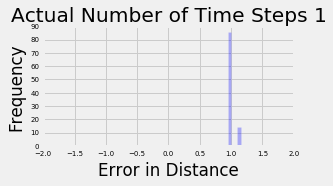

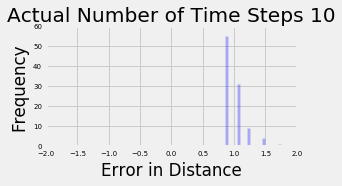

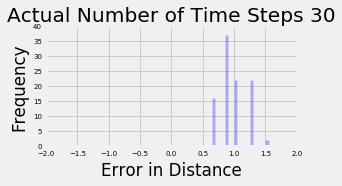

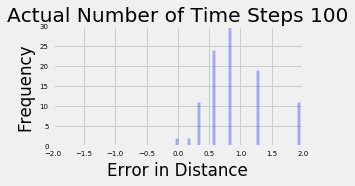

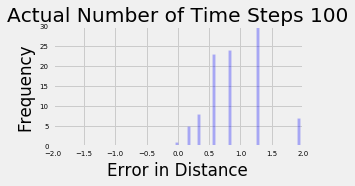

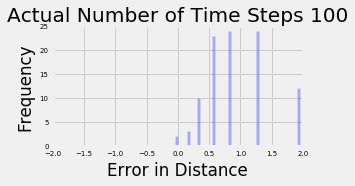

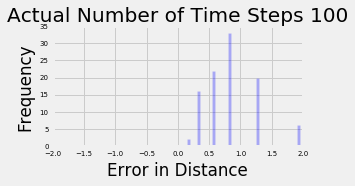

In [10]:
plots.rc('xtick', labelsize=7) 
plots.rc('ytick', labelsize=7)
times = [1,10,30,100,100,100,100]
for i in times:
    judge_time(i)
    ans   = judge_time(i)
    title = "Actual Number of Time Steps " + str(i)
    x_lab = "Error in Distance"
    y_lab = "Frequency"
    plots.hist(ans, bins = np.arange(-2,2,0.05), alpha =.3, color ="blue")
    plots.title(title)
    plots.xlabel(x_lab) 
    plots.ylabel(y_lab)
    plots.figure()

### Varying alpha, consistent time-steps = 15

In [11]:
def judge_alpha(alpha):
    ans = judge_jukes(alpha,15,"GATTACA")
    # ans = plots.hist(ans, bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
    stats = [np.subtract(*np.percentile(ans, [75, 25])),np.median(ans)]
    print(stats)
    return ans

[0.33647223662121306, 1.0041506798272584]
[0.28768207245178079, 1.0972978603872034]
[1.0986122886681096, 0.75276296849536806]
[1.0986122886681096, 0.37776296849536806]
[1.0986122886681096, 0.0027629684953680567]
[0.7945134575869861, -0.40066344122465947]
[1.0986122886681096, -1.4972370315046319]
[0.69314718055994495, -2.2472370315046319]


/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:56: RuntimeWarning: divide by zero encountered in log


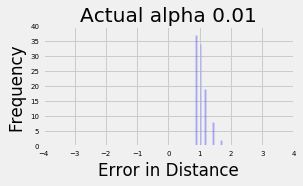

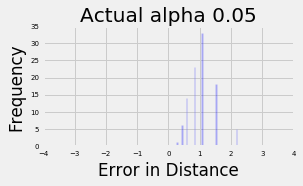

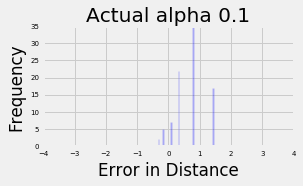

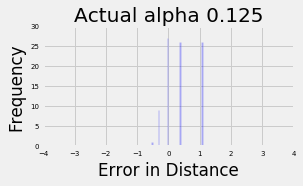

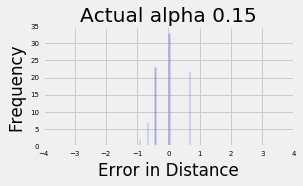

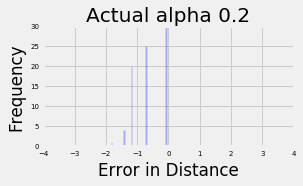

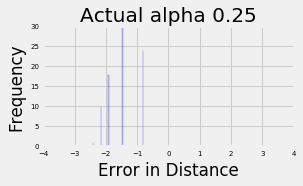

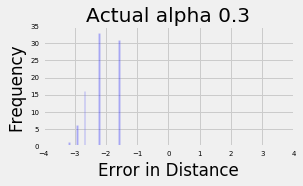

In [12]:
plots.rc('xtick', labelsize=7) 
plots.rc('ytick', labelsize=7)
alphas = [.01,.05,.1,.125,.15,.2,.25,.3]
for i in alphas:
    ans   = judge_alpha(i)
    title = "Actual alpha " + str(i)
    x_lab = "Error in Distance"
    y_lab = "Frequency"
    plots.hist(ans, bins = np.arange(-4,4,0.05), alpha =.3, color ="blue")
    plots.title(title)
    plots.xlabel(x_lab) 
    plots.ylabel(y_lab)
    plots.figure()

To begin to understand the mechanics behind the UPGMA and Neighbor-Joining algorithms, we used a small input sequence (a small string) to see what kind of tree we would be able to recover; however, we were unsuccessful, because the string was much  too small and not within the parameters of the model. Because of this, we escalated to a larger data set, the data set aforementioned: the HIV dataset. This dataset originated from the curious case of a dentist infecting six of his patients with HIV.

In [13]:
def judge_time_dentist(time):
    ans = judge_jukes(.01,time,dnt)
    # ans = plots.hist(ans, bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
    stats = [np.subtract(*np.percentile(ans, [75, 25])),np.median(ans)]
    print(stats)
    return ans

[0.0093313274288844283, 0.99927363678532921]
[0.0062112000926408673, 0.99927363678532921]
[0.02117720595844319, 0.99684982598991778]
[0.020339684237122735, 0.99684982598991778]
[0.03681397312271617, 0.98665695703653555]
[0.05318226546030913, 0.99076373898918901]
[0.075637414205619979, 0.8070914399091631]
[0.068992871486951213, 0.8070914399091631]
[0.090026151657719655, 0.8070914399091631]
[0.081678031014267072, 0.79339259555100128]
[0.063976130373853746, 0.8070914399091631]
[0.081678031014267072, 0.79000275205831183]
[0.075637414205619979, 0.80021856062140095]
[0.085637627155033424, 0.81401188275373704]


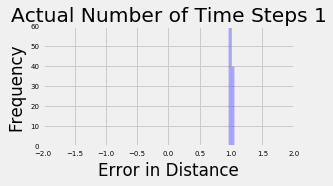

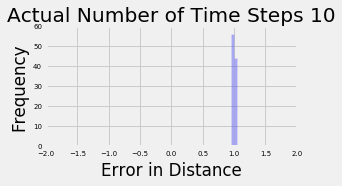

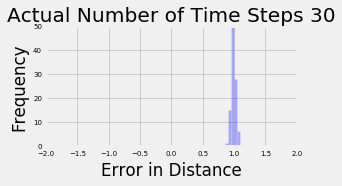

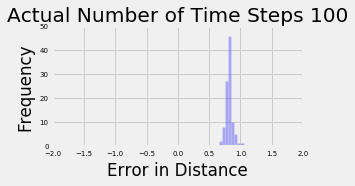

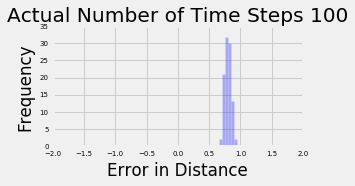

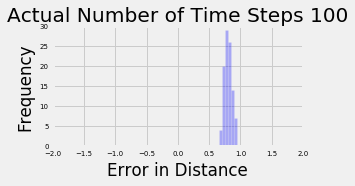

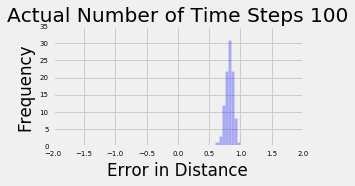

In [14]:
plots.rc('xtick', labelsize=7) 
plots.rc('ytick', labelsize=7)
times = [1,10,30,100,100,100,100]
for i in times:
    judge_time_dentist(i)
    ans   = judge_time_dentist(i)
    title = "Actual Number of Time Steps " + str(i)
    x_lab = "Error in Distance"
    y_lab = "Frequency"
    plots.hist(ans, bins = np.arange(-2,2,0.05), alpha =.3, color ="blue")
    plots.title(title)
    plots.xlabel(x_lab) 
    plots.ylabel(y_lab)
    plots.figure()

In [15]:
def judge_alpha_dentist(alpha):
    ans = judge_jukes(alpha,15,dnt)
    # ans = plots.hist(ans, bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
    stats = [np.subtract(*np.percentile(ans, [75, 25])),np.median(ans)]
    print(stats)
    return ans

[0.028573372444056111, 0.9990355791604878]
[0.083881483980701832, 0.91583136991298231]
[0.092297032917145416, 0.58334481653732118]
[0.092373320131015291, 0.31370533219514751]
[0.13652544038620162, 0.034015511999472281]
[0.090974405831112382, -0.62289406493451605]
[0.098845834636632546, -1.3606239723427014]
[0.13517477836825265, -2.0982014523441439]


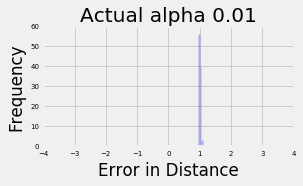

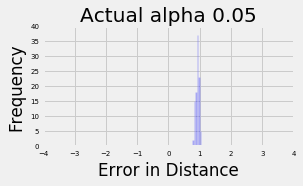

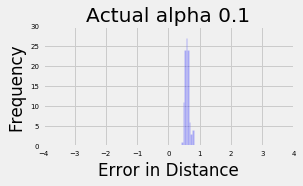

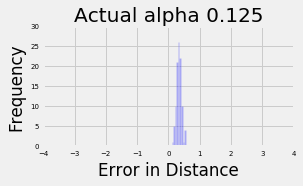

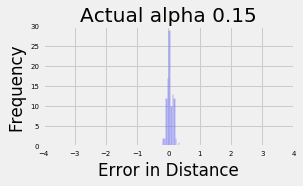

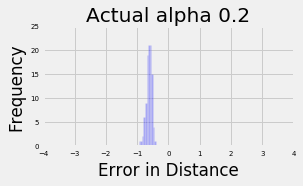

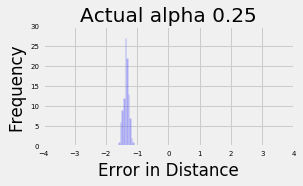

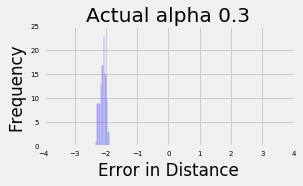

In [16]:
plots.rc('xtick', labelsize=7) 
plots.rc('ytick', labelsize=7)
alphas = [.01,.05,.1,.125,.15,.2,.25,.3]
for i in alphas:
    ans   = judge_alpha_dentist(i)
    title = "Actual alpha " + str(i)
    x_lab = "Error in Distance"
    y_lab = "Frequency"
    plots.hist(ans, bins = np.arange(-4,4,0.05), alpha =.3, color ="blue")
    plots.title(title)
    plots.xlabel(x_lab) 
    plots.ylabel(y_lab)
    plots.figure()

## UPGMA  and Neighbor-Joining Algorithm

An interesting thing to note is that we first implemented Neighbor Joining and UPGMA seperately, but then noticed that we could refactor the code to be much more concise. In doing so we created neighbor_based_method and used first class functions in Python as arguments to implement the exact parts of the algorithm which differ, essentially using a composition of more basic functions for the actual implmentation of Neighbor Joining and UPGMA. We found it really cool how after doing this the nearly 1 to 1 correspondence of the functional code and the algorithms themselves highlights the precise differences between Neighbor Joining and UPGMA, mostly that UPGMA is like Neighbor Joining but does not necissarily join true neighbors (we knew this from our proofs in class, but it was really interesting to see how apparent this distinction is by implementing non-redundant code).

In [17]:
"""
Computes a list whose ith entry is the distance from taxa i to all of the other taxa in the distance matrix
Args:
    M: Upper triangular distance matrix
Returns:
    "sums" which is a list whose ith entry is the distance from taxa i to all of the other taxa in the distance matrix
"""
def sums_others(M):
    size = len(M)
    sums = np.zeros(size)
    for i in xrange(size):
        s = 0
        for other in xrange(size):
            s += M[min(other, i), max(other, i)]
        sums[i] = s
    return sums

"""
Computes a tuple of "coordinates" whose entries i and j correspond to the numbers of the two taxa that are to be joined
Args:
    M: Criterion matrix could be Q matrix or just a distance matrix
Returns:
    "coordinates" whose entries i and j correspond to the numbers of the two taxa that are to be joined
"""
def closest_neighbors(M):
    size = len(M)
    min = sys.maxint
    coordinates = (0,0)
    for i in xrange(size-1):
        for j in xrange(i + 1, size):
            if M[i,j] <= min:
                min = M[i,j]
                coordinates = (i,j)
    return coordinates

"""
Makes Q matrix that decides what will be joined 
Args:
    M: Upper triangular matrix
Returns:
    Q matrix
"""
def make_Q_matrix(M):
    sums = sums_others(M)
    N  = M.shape[0]        # number of taxa
    Q  = np.zeros(M.shape) # matrix to be returned 
    for i in xrange(N):
        for j in xrange(N):
            if i < j:
                Q[i][j] = (N-2)*M[i][j] - sums[i] - sums[j]
    return Q

"""
Computes the subsequent Distance Entry of the UPGMA algorithm
Args:
    M:     the transition Matrix for the Jukes Cantor Algorithm
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
    j:     taxa that we want to find distance to new node 
Returns:
    new distance using from j to cherry
"""
def UPGMA_new_dist(M, taxa1, taxa2, j):
    return (M[min(taxa1, j), max(taxa1, j)] + M[min(taxa2, j), max(taxa2, j)]) / 2

"""
Computes the subsequent Distance Entry of the NJ algorithm
Args:
    M:     the old distance matr
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
    j:     taxa that we want to find distance to new node 
Returns:
    new distance using from j to cherry
"""
def neighbor_joining_new_dist(M, taxa1, taxa2, j):
    return (M[min(taxa1, j), max(taxa1, j)] + M[min(taxa2, j), max(taxa2, j)] - M[taxa1, taxa2])/2.0
    
"""
Variety of parents_dist_functions that makes molecular clock assumption and uses arithmetic mean for edge distances from MRCA
    M:     the old distance matr
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
Returns:
    tuple of size 2 entries containing arithmetic mean of taxa1 and taxa2
"""
def split_dist(M, taxa1, taxa2):
    avg_dist = M[taxa1, taxa2]/2
    return (avg_dist, avg_dist)

"""
Variety of parents_dist_functions that uses 4 point condition to create edge distances from MRCA
    M:     the old distance matr
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
Returns:
    tuple of size 2 entries containing arithmetic mean of taxa1 and taxa2
"""

def neighbor_joining_parent_dist(M, taxa1, taxa2):
    sums = sums_others(M)
    taxa1_dist = M[taxa1, taxa2]/2.0 + (sums[taxa1] - sums[taxa2])/(2*(len(M)-2))
    return (taxa1_dist, M[taxa1, taxa2] - taxa1_dist)
    
"""
Updates Distance Matrix A reflecting the joining of taxa1 and taxa2
Args:
    M:           the old distance matrix
    taxa1:       taxa that was combined 
    taxa2:       taxa that was combined 
    new_dist_fn: function that determines how we compute new distances for our distance matrix 
Returns:
    new distance matrix
"""
def update_matrix(M, taxa1, taxa2, new_dist_fn):
        size  = len(M)
        new_size = size - 1
        ans       = np.zeros((new_size, new_size))

        # will use the 0th row and column for the new species in the matrix
        #
        # copies over the vales from the old matrix
        new_row = 1
        for i in xrange(size - 1):
            if i != taxa1 and i != taxa2:
                new_col = new_row + 1
                for j in xrange(i + 1, size):
                   if j != taxa1 and j != taxa2:
                       ans[new_row,new_col] = M[i,j]
                       new_col += 1
                new_row +=1
        
        # compute the first row of entries
        new_col = 1
        for j in xrange(size):
            if j != taxa1 and j != taxa2:
                #exploits the fact that we have an upper triangular so col > row always
                ans[0,new_col] = new_dist_fn(M, taxa1, taxa2, j)
                new_col += 1
        return ans

"""
Work horse function of the distance based methods file. 
Args:
    M:           the old distance matrix
    taxa1:       taxa that was combined 
    taxa2:       taxa that was combined 
    new_dist_fn: function that determines how we compute new distances for our distance matrix 
Returns:
    new distance matrix
"""

def neighbor_based_method(M, names, closest_neighbors_fn, new_dist_fn, parent_dist_fn):
    def search_nodes(trees ,name):
        for tree in trees:
            if tree.name == name:
                return tree
    trees = []
    while True:
        taxa1, taxa2 = closest_neighbors_fn(M)
        if taxa1 > taxa2:
            tmp = taxa1
            taxa1 = taxa2
            taxa1 = tmp
        #define a new parent for the join
        t = Tree()
        #search for the children in trees and add them
        A = search_nodes(trees, names[taxa1])
        if A == None:
            A = t.add_child(name = names[taxa1])
        else:
            t.add_child(A)
            trees.remove(A)
        B = search_nodes(trees, names[taxa2])
        if B == None:
            B = t.add_child(name = names[taxa2])
        else:
            t.add_child(B)
            trees.remove(B)
        #delete old taxa names and update the new name
        new_names = [names[taxa1] + names[taxa2]]
        del names[taxa2]
        del names[taxa1]
        [new_names.append(name) for name in names]
        names = new_names
        #create the distance between children and parent
        A.dist, B.dist = parent_dist_fn(M, taxa1, taxa2)
        #name the parent
        t.name = names[0]
        #add the new subtree
        trees.append(t)

        if len(M) <= 2:
            break
        M = update_matrix(M, taxa1, taxa2, new_dist_fn)
    return trees[0]

"""
Constructs a Jukes Cantor transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def JC_matrix(a):

    """
    >>> np.trace(JC_matrix(.25))
    3.0
    """

    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M


"""
Computes proportion of differing letters from two strings of the same size
Args:
    s1: string 1 or tokenized list
    s2: string 2 or tokenized list
Returns:
    Throws error if the strings are not of the same length
    Else, returns proportion (in between 0 and 1) of differing letters
"""

def prop_diff(s1,s2):
    # """ LOOK curious as to why this isn't working
    # >>> prop_diff("ATTGAC","ATGGCC") 
    # float(2)/float(6)  
    # """
    if len(s1) != len(s2):
        raise ValueError("Cannot compute compare DNA sequences of differing length")
    diffs = 0
    i     = 0
    while i < len(s1):
        if s1[i] != s2[i]:
            diffs += 1
        i += 1
    return float(diffs)/float(len(s1))

"""
Computes the JC distance between two sequences.
Args:
    s1: string 1
    s2: string 2 
Returns:
    Throws error if the strings are not of the same length
    Else, computes JC distance
"""

def JC_distance(s1,s2):
    prop_diffs = prop_diff(s1,s2)
    return 1 - (np.log(1 - 4/3*prop_diffs))

"""
Runs the UPGMA algorithm by calling neighbhor_based_method thus outputting a tree
Args:
    M:     the old distance matrix
    names: list of the names of all the sequences 
Returns:
    Tree gennerated according to the UPGMA algorithm

"""
def UPGMA(M, names):
    return neighbor_based_method(M, names, closest_neighbors, UPGMA_new_dist, split_dist)

"""
Runs the neighbhor_joining algorithm by calling neighbhor_based_method thus outputting a tree
Args:
    M:     the old distance matrix
    names: list of the names of all the sequences 
Returns:
    Tree gennerated according to the neighbhoor joining algorithm
"""
def neighbor_joining(M, names):
    return neighbor_based_method(M, names, lambda m : closest_neighbors(make_Q_matrix(m)), neighbor_joining_new_dist, neighbor_joining_parent_dist)


We used small examples we found online to test the algorithms.

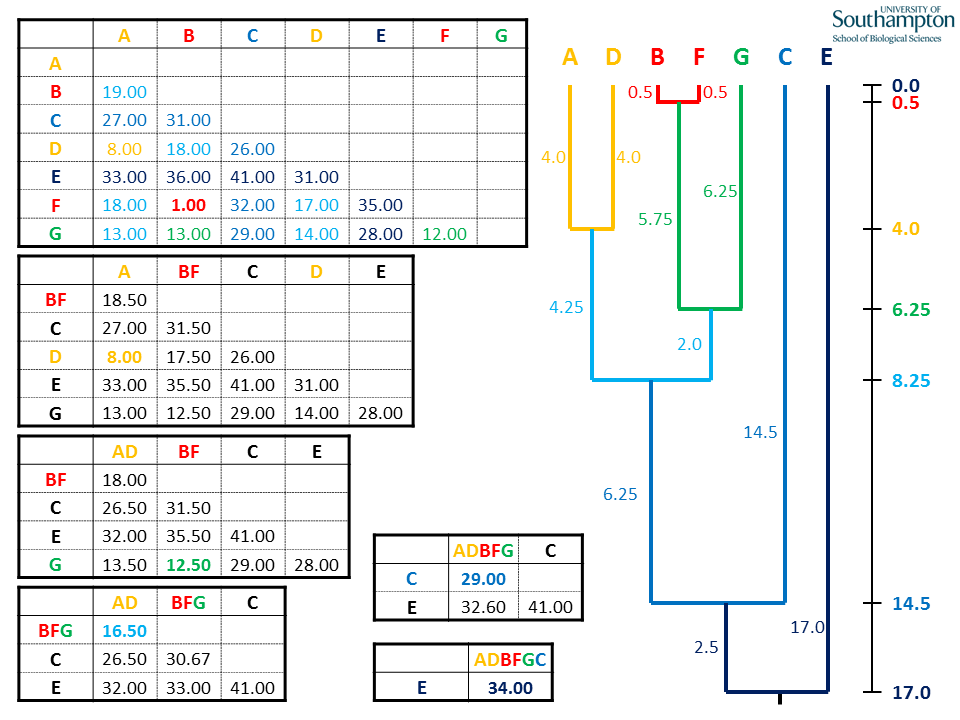

In [18]:
import IPython.display 
art  = IPython.display.Image("http://www.southampton.ac.uk/~re1u06/teaching/upgma/upgma15.PNG")
art

In [19]:
M = np.array([[0, 19.0,  27.0,  8.0, 33.0, 18.0 ,13.0],
                    [0,    0,  31.0, 18.0, 36.0,  1.0, 13.0],
                    [0,    0,   0,   26.0, 41.0, 32.0, 29.0],
                    [0,    0,   0,      0, 31.0, 17.0, 14.0],
                    [0,    0,   0,      0,    0, 35.0, 28.0],
                    [0,    0,   0,      0,    0,    0, 12.0],
                    [0,    0,   0,      0,    0,    0,   0 ]
                     ])

names = ['a', 'b', 'c', 'd','e','f','g']


ans = neighbor_based_method(M,names, closest_neighbors, UPGMA_new_dist, split_dist)
print(ans)


               /-b
            /-|
         /-|   \-f
        |  |
      /-|   \-g
     |  |
     |  |   /-a
   /-|   \-|
  |  |      \-d
--|  |
  |   \-c
  |
   \-e


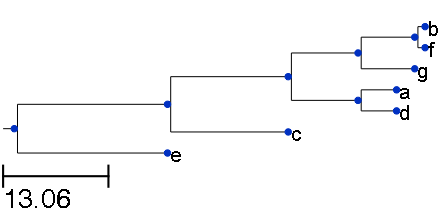

In [20]:
art  = IPython.display.Image("http://i.imgur.com/GmsLjVW.png")
art

Above we see that the proportions are correct, but the scaling factor is off slightly from the internet example

### Simulation-based assessmnet of our models

Up until this point the only tests we have been running, have tested whether or not we gave the correct implementation of the Phylogenetic Algorithms. A natural question to ask oursevles at this point is: whether or not there is some way to simulate phylogenetic trees in order to better test the validity of our models.  A very natural choice is the **TODO: explain how mutate and evolution simulator actually work**

Below we have created a mutate() function to simulate evolution according to Jukes Cantor on various sequencences. Compute the Jukes Cantor distance between the final sequence and the initial sequence, and compare to the actual distance. How does varying the parameters (Jukes-Cantor parameter and time) effect this?

## Mutate Function and Evolution Simulator

In [26]:
"""
Simulates Evolution of a DNA sequence with 
    a                : alpha level (mutation rate)
    sim_time         : total time simulating
    timestep         : timestep will dictate distance between father and son node
    seq              : original input seqeuence
    selectionFn      : Decides who survives from population
    paramater        : list contating parameters to be fed into the selection fn
    expansion_factor : multiplication factor that determines number of seqs in the population. pop_size_n = 2*pop_size_n-1 - those killed by selectionFn
"""

def evolution_simulator(a, sim_time, timestep, seq,selectionFn, paramater, expansion_factor):
    t = Tree(name= seq)
    def tree_helper(curr_time, t):
        if curr_time >= sim_time - timestep:
            return
        pop = [t.name]*expansion_factor
        pop = map(lambda x: mutate(a, timestep, x), pop) # Mutates everything in the population
        pop = selectionFn(pop,paramater) # selects the survivors
        for taxa in pop:
            new_t = t.add_child(name = taxa)
            new_t.dist = timestep
            tree_helper(curr_time+timestep, new_t)
    tree_helper(0, t)
    return t

"""
Kills on average "proportion" of the population. (Uniform Distribution)
    pop       : population of sequnces that Uniform Killing decides whether or not to kill
    parameter : parameter of uniform distribution (i.e. on average how many will survive)
"""
def uniform_killing(pop, proportion):
    # filter keeps seqeunces less than proportion
    return filter(lambda y: np.random.rand() < proportion, pop)


### Data Analysis Using NJ and UPGMA

In [22]:
names = ["dnt", "ptb", "ptc", "ptd", "ctrl1", "ctrl5"]
seqs  = [dnt, ptb, ptc, ptd, ctrl_1, ctrl_5]
M     = JC_matrix_maker(seqs)
tree  = UPGMA(M, names)
print(tree)


         /-ptd
      /-|
     |   \-ctrl5
   /-|
  |  |      /-dnt
  |  |   /-|
--|   \-|   \-ptb
  |     |
  |      \-ptc
  |
   \-ctrl1


Using our metric tree browser we see:

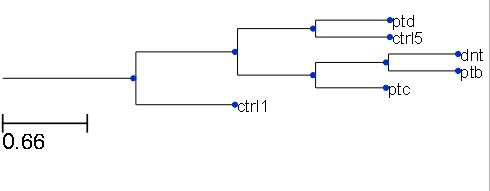

In [23]:
art  = IPython.display.Image("http://i.imgur.com/IUtFvPJ.png")
art

**Analysis:** From  the visualization of the UPGMA metric tree, it appears as if the dentist infected patients B and C but there is not enough evidence from the above tree that the dentist infected patient D.

In [24]:
names = ["dnt", "ptb", "ptc", "ptd", "ctrl1", "ctrl5"]
seqs  = [dnt, ptb, ptc, ptd, ctrl_1, ctrl_5]
M     = JC_matrix_maker(seqs)
tree  = neighbor_joining(M, names)
print(tree)


            /-dnt
         /-|
      /-|   \-ptc
     |  |
   /-|   \-ptb
  |  |
--|   \-ptd
  |
  |   /-ctrl1
   \-|
      \-ctrl5


/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in double_scalars


### Data Analysis Using Evolution Simulator

Here we benchmark our Neighbor Joining algorithm against the simulated trees using our evolution simulator. This is done by running the simulator 5 times and then using the Neighbor Joining algorithm to infer the tree from only the leaves. We can then visually compare the true tree to the inferred tree.

Note that the trees produced by our mutation method will have intermediate nodes in a line such as - /- /- /- , in the reconstructed trees these will be a single tree edge. This occurs when only a single taxa survives a round of natural selection in the simulation. In comparing the trees we will consider such collections of edges as a single edge as that is what they represent topologically in terms of a phylogentic tree.

In [28]:
leaf_data = []
for i in xrange(5):
    alpha     = np.random.uniform(0,0.3)
    t = evolution_simulator(alpha, 40, 10, 'GATTACA', uniform_killing, .7, 2)
    counter = 0
    ## full sequence is unreadable so move name to sequence, also record names and sequences for inference
    names = []
    leaves = []
    for leaf in t.iter_leaves():
        leaf.sequence = leaf.name
        leaf.name = counter
        names.append(counter)
        leaves.append(leaf.sequence)
        counter += 1
    leaf_data.append((names, leaves))
    if len(names) >=3:
        print(t)


      /- /-0
-- /-|
     |   /-1
      \-|
         \-2

         /-0
      /-|
-- /-|   \-1
     |
      \- /-2


In [29]:
for data in leaf_data:
    names, seqs = data
    if len(names) >=3:
        M = JC_matrix_maker(seqs)
        print(neighbor_joining(M, names))


      /-0
   /-|
--|   \-2
  |
   \-2

      /-0
   /-|
--|   \-2
  |
   \-2


/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:258: RuntimeWarning: divide by zero encountered in log
/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in double_scalars
/Users/nixonpjoshua/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in double_scalars


## Conclusion